In [12]:
import math
import os
import random
import re
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('trainingdata.txt', names=["timeCharge","timeDischarge"], header=None)
df.head()

,timeCharge,timeDischarge
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80


<Axes: xlabel='timeCharge', ylabel='timeDischarge'>

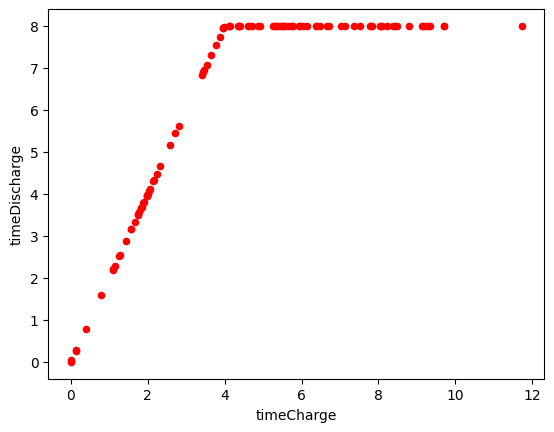

In [16]:
df.plot.scatter(x='timeCharge',y='timeDischarge',c='Red')

In [41]:
trainX = df["timeCharge"].values
trainY = df["timeDischarge"].values

trainX = np.array(trainX.reshape((-1, 1)))

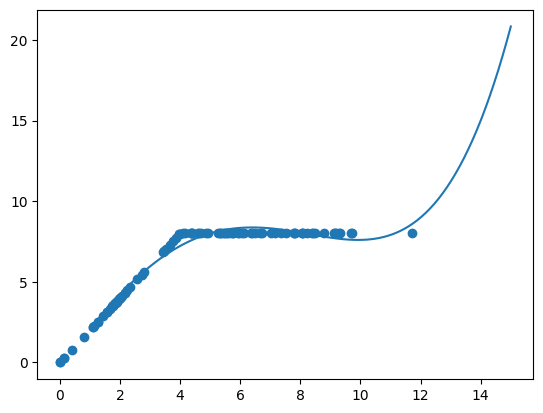

In [ ]:
mymodel = np.poly1d(np.polyfit(trainX.flatten(), trainY, 3))

myline = np.linspace(1, 15, 100)

plt.scatter(trainX.flatten(), trainY)
plt.plot(myline, mymodel(myline))
plt.show()

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(trainX)

lr_model = LinearRegression()
lr_model.fit(X_poly,trainY)

LinearRegression()

In [54]:
r_sq = lr_model.score(X_poly, trainY)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.983809937617783


In [55]:
testX_poly = poly.transform([[1.5]])
predY = lr_model.predict(testX_poly)

print(predY)

[3.19136839]


Piecewise Regression

In [59]:
import piecewise_regression

trainX = df["timeCharge"].values
trainY = df["timeDischarge"].values

pw_model = piecewise_regression.Fit(trainX, trainY, n_breakpoints=1)
pw_model.summary()


                    Breakpoint Regression Results                     
No. Observations                      100
No. Model Parameters                    4
Degrees of Freedom                     96
Res. Sum of Squares           9.52278e-28
Total Sum of Squares              596.246
R Squared                        1.000000
Adjusted R Squared               1.000000
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const           -2.22045e-15     1.02e-15      -2.1806        0.0317  -4.2417e-15   -1.992e-16
alpha1                   2.0     4.38e-16   4.5621e+15           0.0          2.0          2.0
beta1                   -2.0     5.03e-16  -3.9774e+15             -         -2.0         -2.0
breakpoint1              4.0     6.33e-16            -             -          4.0          4.0
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                      100\nNo. Model Parameters                    4\nDegrees of Freedom                     96\nRes. Sum of Squares           9.52278e-28\nTotal Sum of Squares              596.246\nR Squared                        1.000000\nAdjusted R Squared               1.000000\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst           -2.22045e-15     1.02e-15      -2.1806        0.0317  -4.2417e

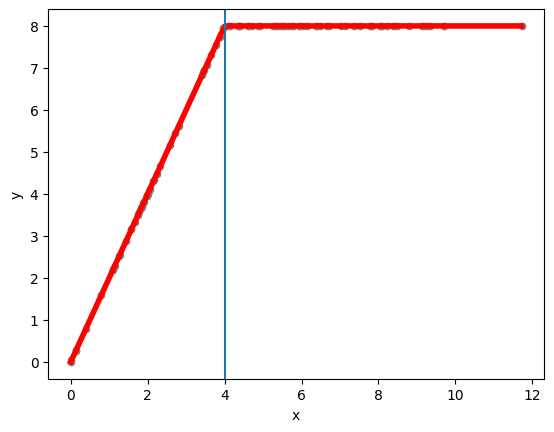

In [60]:
import matplotlib.pyplot as plt

# Plot the data, fit, breakpoints and confidence intervals
pw_model.plot_data(color="grey", s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_model.plot_fit(color="red", linewidth=4)
pw_model.plot_breakpoints()
pw_model.plot_breakpoint_confidence_intervals()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.close()

In [65]:
testX = [0.09]
predY = pw_model.predict(testX)

print(predY)

[0.18]


Manual Piecewise Regression

In [72]:
piece1 = df.loc[df["timeCharge"] <= 4]
piece2 = df.loc[df["timeCharge"] > 4]

In [73]:
train_piece1X = piece1["timeCharge"].values
train_piece1Y = piece1["timeDischarge"].values
train_piece2X = piece2["timeCharge"].values
train_piece2Y = piece2["timeDischarge"].values

train_piece1X = np.array(train_piece1X.reshape((-1, 1)))
train_piece2X = np.array(train_piece2X.reshape((-1, 1)))

In [74]:
from sklearn.linear_model import LinearRegression

lr1_model = LinearRegression()
lr2_model = LinearRegression()

lr1_model.fit(train_piece1X,train_piece1Y)
lr2_model.fit(train_piece2X,train_piece2Y)

LinearRegression()

In [88]:
testX = 3.76

if testX <= 4:
    predY = lr1_model.predict([[testX]])
else:
    predY = lr2_model.predict([[testX]])

print(round(predY[0],2))

7.52
